**Нейронная сеть прямого распространения** (Feedforward Neural Network, FNN) — это тип искусственной нейронной сети, в которой информация проходит через сеть только в одном направлении: от входных нейронов через скрытые слои к выходным нейронам. Эта архитектура отличается от рекуррентных нейронных сетей, где информация может проходить в цикле.

In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split
# from sklearn.neural_network import MLPRegressor, MLPClassifier

**Регрессор**

**Классификатор**

MLPClassifier (Multi-Layer Perceptron Classifier) — это реализация многослойного перцептрона (MLP) для классификации в библиотеке scikit-learn. Многослойный перцептрон — это тип нейронной сети прямого распространения, который состоит из одного или нескольких скрытых слоев, каждый из которых содержит нейроны с нелинейными активационными функциями.

In [2]:
pd.options.display.max_rows = None

df = pd.read_csv("apple_quality.csv")

## A_id: Unique identifier for each fruit
## Size: Size of the fruit
## Weight: Weight of the fruit
## Sweetness: Degree of sweetness of the fruit
## Crunchiness: Texture indicating the crunchiness of the fruit
## Juiciness: Level of juiciness of the fruit
## Ripeness: Stage of ripeness of the fruit
## Acidity: Acidity level of the fruit
## Quality: Overall quality of the fruit

df

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good
5,5,-3.425400,-1.409082,-1.913511,-0.555775,-3.853071,1.914616,-2.981523,bad
6,6,1.331606,1.635956,0.875974,-1.677798,3.106344,-1.847417,2.414171,good
7,7,-1.995462,-0.428958,1.530644,-0.742972,0.158834,0.974438,-1.470125,good
8,8,-3.867632,-3.734514,0.986429,-1.207655,2.292873,4.080921,-4.871905,bad
9,9,-0.727983,-0.442820,-4.092223,0.597513,0.393714,1.620857,2.185608,bad


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   int64  
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 281.4+ KB


In [4]:
df['Acidity'] = pd.to_numeric(df['Acidity'], errors='coerce')

quality = {"bad": 0, "good": 1}
df['Quality'] = df['Quality'].replace(quality)
df.drop(["A_id"],axis=1,inplace=True)

df

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1
5,-3.425400,-1.409082,-1.913511,-0.555775,-3.853071,1.914616,-2.981523,0
6,1.331606,1.635956,0.875974,-1.677798,3.106344,-1.847417,2.414171,1
7,-1.995462,-0.428958,1.530644,-0.742972,0.158834,0.974438,-1.470125,1
8,-3.867632,-3.734514,0.986429,-1.207655,2.292873,4.080921,-4.871905,0
9,-0.727983,-0.442820,-4.092223,0.597513,0.393714,1.620857,2.185608,0


In [5]:
# x = df.drop(["Quality"],axis=1)
# y = df.Quality.values
data = load_iris()
x = data.data
y = to_categorical(data.target)

x_train,x_test,y_train,y_test = train_test_split(x, y,test_size=0.2,random_state=42)

In [6]:
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [7]:
# nnc = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, activation='relu', solver='adam', random_state=42).fit(x_train, y_train)

In [8]:
# y_pred = nnc.predict(x_test)

In [9]:
model = Sequential()
model.add(Dense(10, input_dim=4, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Компиляция модели
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Обучение модели
model.fit(x_train, y_train, epochs=100, batch_size=5, verbose=1)

y_pred = model.predict(x_test)  # Предсказанные вероятности
y_pred_classes = np.argmax(y_pred_proba, axis=1)

Epoch 1/100


C:\Users\cherp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 739us/step - accuracy: 0.3317 - loss: 1.7725 
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step - accuracy: 0.3555 - loss: 1.3787
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step - accuracy: 0.3813 - loss: 1.2123
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step - accuracy: 0.2922 - loss: 1.1520
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step - accuracy: 0.4168 - loss: 1.1322
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step - accuracy: 0.3371 - loss: 1.0853
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step - accuracy: 0.2980 - loss: 1.0636
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step - accuracy: 0.3100 - loss: 1.0360
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - accuracy: 0.2823 - loss: 1.0245   
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step - accuracy: 0.3354 - loss: 0.9884
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step - accuracy: 0.5274 - loss: 0.9599
Epoch 12/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/

In [10]:
y_pred_classes

array([1, 0, 2, 1, 1, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 1,
       0, 2, 2, 2, 2, 2, 0, 0], dtype=int64)

ValueError: Classification metrics can't handle a mix of multilabel-indicator and multiclass targets

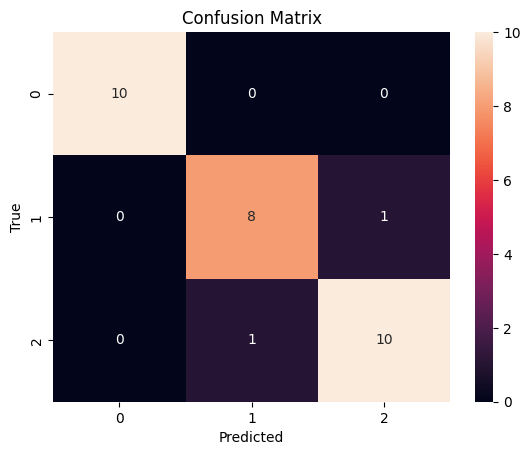

In [11]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_test_classes = np.argmax(y_test, axis=1)

matrix = confusion_matrix(y_test_classes, y_pred_classes)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print(classification_report(y_test_classes, y_pred_classes))